<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor) + [solution](https://www.kaggle.com/kashnitsky/a8-demo-implementing-online-regressor-solution).**

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [12]:
a = np.array([[1,2,3], [4,5,6]])
b = np.ones((a.shape[0], 1))
c = np.hstack((b, a))
c

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.]])

In [20]:
len(np.array([3,4,5]))

3

In [16]:
c[1]

array([1., 4., 5., 6.])

In [78]:
import math

class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        
        self.mse_ = []
        self.weights_ = []
        
        self.w_ = None
        self.best_mse_ = math.inf
        
    def update(self, w, X, y):
        diff = np.dot(X, w) - y
        mse = np.dot(diff.T, diff) / len(y)
        
        self.mse_.append(mse)
        self.weights_.append(w)
        
        best = mse < self.best_mse_
        if best:
            self.w_ = w
            self.best_mse_ = mse
        
#         print('%sMSE: %.4f, w: %s' % ('+++ ' if best else '   ', mse, w))
        
    def fit(self, X, y):        
        bias = np.ones((X.shape[0], 1))
        X = np.hstack((bias, X))
        
        w = np.zeros(X.shape[1])
        
        with tqdm(total=self.n_epochs * X.shape[0]) as pbar:        
            for epoch in np.arange(self.n_epochs):
                for i in np.arange(X.shape[0]):
                    x_i = X[i]
                    y_i = y[i]

                    w = w + self.eta * (y_i - np.dot(w.T, x_i)) * x_i
                    self.update(w, X, y)
                    
                    pbar.update(1)
                
        return self
                  
    def predict(self, X):
        bias = np.ones((X.shape[0], 1))
        X = np.hstack((bias, X))            
        
        return np.dot(X, self.w_)

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [41]:
data_demo = pd.read_csv('../../data/weights_heights.csv')

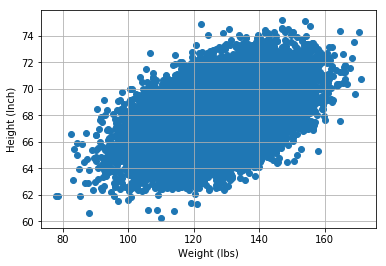

In [42]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [43]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [79]:
sgd = SGDRegressor().fit(X_train_scaled, y_train)

100%|██████████| 52500/52500 [00:03<00:00, 17303.65it/s]


Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

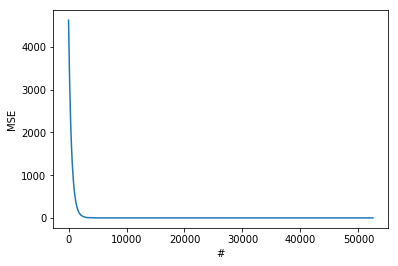

In [80]:
plt.plot(range(len(sgd.mse_)), sgd.mse_)
plt.xlabel('#')
plt.ylabel('MSE');

Print the minimal value of mean squared error and the best weights vector.

In [81]:
sgd.best_mse_, sgd.w_

(2.7151352406643627, array([67.9898497 ,  0.94447605]))

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

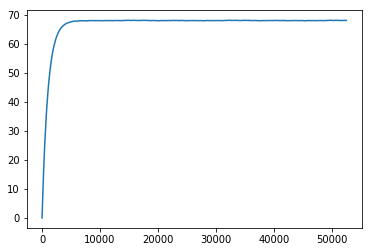

In [82]:
plt.plot(range(len(sgd.weights_)), [w[0] for w in sgd.weights_]);

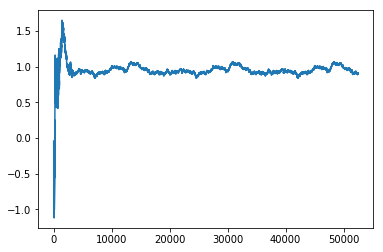

In [83]:
plt.plot(range(len(sgd.weights_)), [w[1] for w in sgd.weights_]);

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [93]:
sgd_holdout_mse = mean_squared_error(y_valid, sgd.predict(X_valid_scaled))
sgd_holdout_mse

2.6708681207033784

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [94]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)

print((linreg.intercept_, linreg.coef_))

linreg_holdout_mse = mean_squared_error(y_valid, sgd.predict(X_valid_scaled))
linreg_holdout_mse

(67.98930834742858, array([0.94537278]))


2.6708681207033784

In [95]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
